In [1]:
# 导入包
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=200

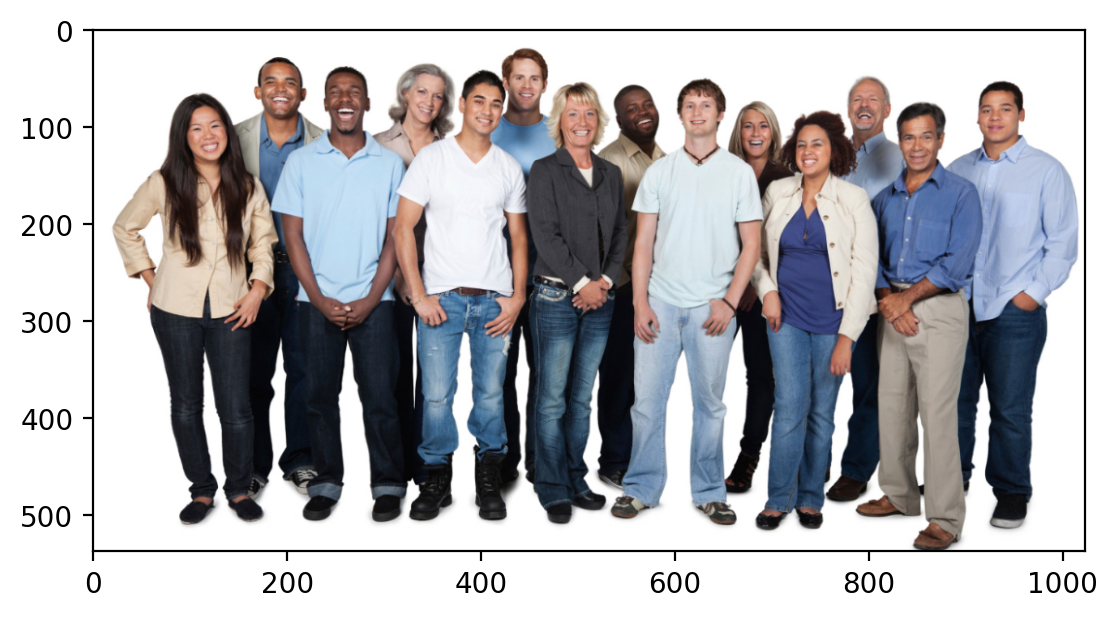

In [2]:
# 读取照片
img = cv2.imread('./images/faces2.jpg')
# 展示
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [3]:
# deploy.prototxt.txt：https://github.com/opencv/opencv/tree/master/samples/dnn/face_detector
# res10_300x300_ssd_iter_140000.caffemodel：https://github.com/Shiva486/facial_recognition/blob/master/res10_300x300_ssd_iter_140000.caffemodel

# 加载模型
face_detector = cv2.dnn.readNetFromCaffe('./weights/deploy.prototxt.txt','./weights/res10_300x300_ssd_iter_140000.caffemodel')

In [4]:
# 原图尺寸
img_height = img.shape[0]
img_width = img.shape[1]

In [5]:
# 缩放至模型输入尺寸
img_resize = cv2.resize(img,(500,300))

In [6]:
# 图像转为blob
img_blob = cv2.dnn.blobFromImage(img_resize,1.0,(500,300),(104.0, 177.0, 123.0))

In [7]:
# 输入
face_detector.setInput(img_blob)

In [8]:
# 推理
detections = face_detector.forward()

In [10]:
detections

array([[[[0.        , 1.        , 0.9757996 , ..., 0.06375282,
          0.21002546, 0.16640264],
         [0.        , 1.        , 0.96749574, ..., 0.1006325 ,
          0.4138369 , 0.20273851],
         [0.        , 1.        , 0.9486636 , ..., 0.1493349 ,
          0.13494208, 0.24810775],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [11]:
# 查看大小
detections.shape

(1, 1, 200, 7)

In [12]:
# 查看检测人脸数量
num_of_detections = detections.shape[2]

In [13]:
num_of_detections

200

97.57996201515198
96.74957394599915
94.8663592338562
93.22230219841003
90.09220004081726
86.59669756889343
85.67280173301697
82.45852589607239
79.4135332107544
68.80930066108704
67.29031205177307
62.124085426330566
40.834394097328186
20.884399116039276


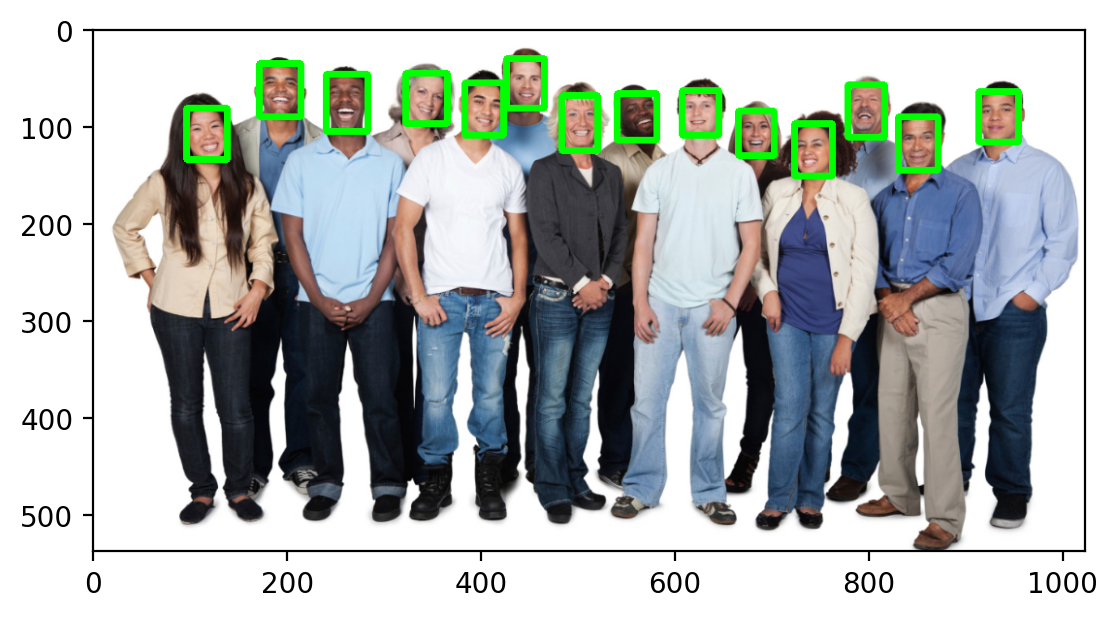

In [14]:
# 原图复制，一会绘制用
img_copy = img.copy()

for index in range(num_of_detections):
    # 置信度
    detection_confidence = detections[0,0,index,2]
    # 挑选置信度
    if detection_confidence>0.15:
        # 位置
        locations = detections[0,0,index,3:7] * np.array([img_width,img_height,img_width,img_height])
        # 打印
        print(detection_confidence * 100)
        
        lx,ly,rx,ry  = locations.astype('int')
        # 绘制
        cv2.rectangle(img_copy,(lx,ly),(rx,ry),(0,255,0),5)


# 展示
plt.imshow(cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB))        